energy:(Hartree) 0.19458083160131906


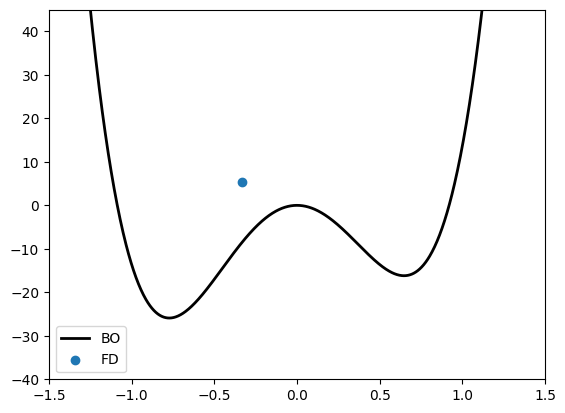

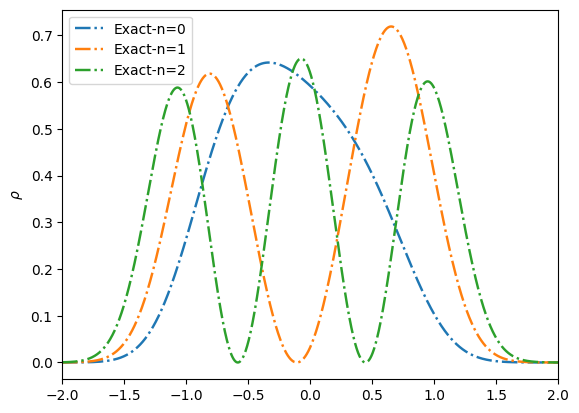

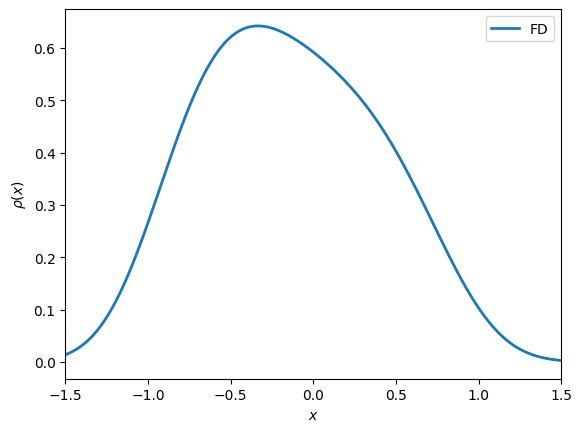

Excitation Energies:(Hartree)
[ 0.19458083  1.73522102  4.54961962  7.82567702 11.54879169 15.63136644
 20.02461716 24.69285755 29.6091053  34.75209002 40.1045434 ]


In [2]:
# import jax.numpy as np
import numpy as np


#mesh of the finite difference 
xmin = -15; xmax = 15; Nmesh = 10000
xmesh = np.linspace(xmin, xmax, Nmesh,dtype=np.float64)
h = xmesh[1] - xmesh[0]

def Vpot(x):
    return 3*x**4 + x**3/2 - 3*x**2
    
def buildH():
    Vx = Vpot(xmesh)
    Vx = np.diag(Vx,0,)
    H_kinetic = (-2 * np.diag(np.ones(Nmesh, dtype=np.float64), 0) + np.diag(np.ones(Nmesh - 1, dtype=np.float64), 1) + np.diag(np.ones(Nmesh - 1, dtype=np.float64), -1))/(2 * h**2)

    H = Vx - H_kinetic
    
    return H 

if __name__=='__main__':

    hartree2ev = 27.2107
    H = buildH()
    w, v = np.linalg.eigh(H)
    idx_sorted = np.argsort(w)
    w,v = w[idx_sorted], v[:, idx_sorted]
    gs_wf = v[:,0]
    normalize_factor = (gs_wf**2).sum() * h
    # rescale to probability amplitude
    gs = gs_wf**2 / normalize_factor
    
    nlowest = 1
    print ('energy:(Hartree)', w[0])

    import matplotlib.pyplot as plt

    xmes_argmax = gs.argmax()
    plt.plot(xmesh, Vpot(xmesh)*hartree2ev, 'k-', lw=2, label="BO")
    plt.scatter(xmesh[xmes_argmax], w[0:nlowest]*hartree2ev,label="FD")
    plt.xlim([-1.5,1.5])
    plt.ylim([-40,45])
    plt.legend()
    plt.show()

    state_indices = np.array([0,1,2])
    for i in state_indices:
        exact_wf_on_mesh = v[:, i]
        normalize_factor = (exact_wf_on_mesh**2).sum() * h
        exact_prob_density = exact_wf_on_mesh**2 / normalize_factor
        plt.plot(xmesh, exact_prob_density, "-.", label=f"Exact-n={i}", lw=1.75)
    plt.xlim([-2.0, 2.0])
    plt.legend()
    plt.ylabel(r"$\rho$")
    plt.show()

    plt.plot(xmesh, gs, label='FD', lw=2)
    plt.xlim([-1.5,1.5])
    plt.xlabel('$x$')
    plt.ylabel(r'$\rho(x)$')
    plt.legend()
    plt.show()

    print("Excitation Energies:(Hartree)")
    num_of_orbs = 10
    print(f"{w[:num_of_orbs+1:]}")